# Regressão Linear -  *Em Construção*

Modelos de Regressão são sem dúvida os mais utilizados por quem inicia sua jornada no mundo do aprendizado de máquina, e isso se deve a facilidade de interpretação do modelo matemático. Mas o que é regressão linear

- O que é regressão Linear

Regressão linear pode ser entendido como uma fórmula matemática que modela a **relação entre duas variaveis**, chamadas de variavel dependente ou alvo e a variavel independente ou preditora. Basicamente usamos os dados de uma variavel para prever o valor de outra variavel.

Mas antes de prosseguirmos no estudo de regressão, devemos primeiro entender o que é significa "relação entre duas variáveis".

Digamos que temos duas informações peso e distância, e queremos saber se a diminuição ou aumento de peso interfere na distância percorrida, conforme tabela a seguir, em outras palavras estamos tentando prever a distancia em metros (variavel dependente) que uma pessoa consegue percorrer baseados no peso em quilogramas (variavel independente).

| Peso(kg) | Distância(m) |
|----------|--------------|
| 60       | 130          |
| 65       | 122          |
| 70       | 115          |
| 75       | 110          |
| 80       | 106          |
| 85       | 97           |
| 90       | 90           |
| 95       | 85           |
| 100      | 83           |


Analisando a tabela acima podemos perceber a existência de relacionamento entre as variaveis, visto que quanto mais o peso aumenta, menor a distância percorrida. Para melhor explicitar esse relacionamento podemos utilizar um diagrama de dispersão.

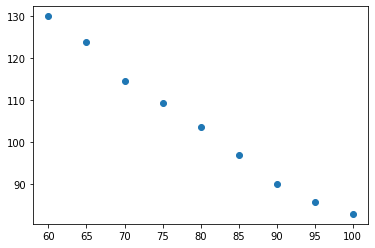

In [7]:
import matplotlib.pyplot as plt
    
peso = [60, 65, 70, 75, 80, 85, 90, 95, 100]
distancia = [130, 123.8, 114.5, 109.4, 103.7, 97, 90, 85.9, 83]

plt.scatter(peso, distancia)

plt.show()

In [ ]:
A linha reta é uma caracteristica definidora da regressão linear

As linhas retas da regressão linear podem ser completamente definidicas por duas propriedades: intercepto e a inclinação

Uma vez ajustado o modelo, convém avaliar a qualidade do ajuste e um dos indicadores mais utilizados para essa finalidade é o coeficiente de determinação

- Premissa da regressão linear

Principais premissas de uma regressão linear efetiva
Premissas a serem consideradas para o sucesso com a análise de regressão linear:

- Para cada variável: Considere o número de casos válidos, médias e desvio padrão.  
- Para cada modelo: Considere coeficientes de regressão, matriz de correlação, correlações de partes e correlações parciais, múltiplos R, R2, R2 ajustado, mudança em R2, erro padrão da tabela de estimativa e análise de variância, valores previstos e resíduos. Além disso, considere intervalos de confiança de 95% para cada coeficiente de regressão, matriz de covariância-variância, fator de inflação de variância, tolerância, teste Durbin-Watson, medidas de distância (valores de Mahalanobis, Cook e utilização), DfBeta, DfFit, intervalos de previsão e informações de diagnóstico por caso.  
- Gráficos: Use gráficos de dispersão, gráficos parciais, histogramas e gráficos de probabilidade normal.
- Dados: As variáveis dependentes e independentes devem ser quantitativas. Variáveis categóricas, como religião, grande campo de estudo ou região de residência, precisam ser recodificadas para variáveis binárias (dummy) ou outros tipos de variáveis de contraste.  
- Outras hipóteses: Para cada valor da variável independente, a distribuição da variável dependente deve ser normal. A variância da distribuição da variável dependente deve ser constante para todos os valores da variável independente. O relacionamento entre a variável dependente e cada variável independente deve ser linear e todas as observações devem ser independentes.

Certifique-se de que seus dados atendam às premissas de regressão linear
Antes de tentar executar a regressão linear, é necessário certificar-se de que seus dados possam ser analisados usando este procedimento. Seus dados devem passar por determinadas premissas necessárias.

Veja como verificar essas premissas:

- As variáveis devem ser medidas a nível contínuo. Exemplos de variáveis contínuas são tempo, vendas, peso e pontuações de teste.  
- Use um gráfico de dispersão para descobrir rapidamente se há um relacionamento linear entre essas duas variáveis.
- As observações devem ser independentes umas das outras (isto é, não deve haver dependência).
- Seus dados não devem possuir valores discrepantes significativos.  
- Verifique a homoscedasticidade, que é um conceito estatístico no qual as variações ao longo da linha de regressão linear de melhor ajuste permaneçam semelhantes por toda a linha.
- Os resíduos (erros) da linha de regressão de melhor ajuste seguem a distribuição normal.

- criando o modelo

- metricas de análise

- performance

Interpecto: é o valor quando y é igual a zero.

Inclinação: é a inclinação da linha, igual ao valor de y quando se aumenta x em 1.

In [ ]:
Modelos lineares não sabem o que é possível ou não na vida real.
Isso significa que eles podem fornecer previsões que não fazem sentido quando aplicadas aos seus dados.
Você precisa entender o que seus dados significam para determinar se uma previsão é absurda ou não.